In [65]:
import importlib
from joblib import Parallel, delayed, cpu_count

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import Modules.read_data_from_cluster as rfc
import Modules.pade_fits as pf
import Modules.figures as figs

plt.rcParams['font.size'] = '16'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = '200'
# plt.rcParams['backend'] = 'ipympl'
%matplotlib ipympl

importlib.reload(rfc)
importlib.reload(pf)
importlib.reload(figs)

color_vs_size = [ 'turquoise',  'tab:olive', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray','tab:blue', 'goldenrod', 'tab:orange', 'tab:red']

color_vs_adj = [ 'turquoise',  'tab:olive', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'goldenrod', 'tab:orange', 'tab:red']

In [82]:
# Simulation parameters to read data
distribution = 'gaussian_EA'
adjacencies = ['random_regular_3', 'random_regular_5', 'random_regular_7', 'random_regular_9',
               '1D+', '1D+', '1D+', '1D+',
               'chimera', 'pegasus', 'zephyr']
add_vs_adj = [0, 0, 0, 0,
              3.0, 5.0, 7.0, 9.0,
              0, 0, 0]
sizes = [100, 200, 400, 800, 1600]
sizes_vs_adj = [_ for _ in range(len(adjacencies))]
for i, adj in enumerate(adjacencies):
    if adj == 'chimera':
        sizes_vs_adj[i] = [72, 200, 392, 800, 1568]
    elif adj == 'pegasus':
        sizes_vs_adj[i] = [128, 256, 448, 960, 1664]
    elif adj == 'zephyr':
        sizes_vs_adj[i] = [48, 160, 336, 576, 1248]
    else:
        sizes_vs_adj[i] = sizes
color_vs_size = ['turquoise',  'tab:olive', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray','tab:blue', 'goldenrod', 'tab:orange', 'tab:red']
marker_vs_adjacency = ['^', '>', 'v', '<', '1', '2', '3', '.', '4', 'P', 'd', '*']


# [Figures 2 and 5] Binder cumulant and derivative with padé approximants

In [67]:
MCS_N_config_condition = 'max_MCS_with_a_minimum_of_N_configs'
min_N_config = 1000
adj_index = 10 # Use 0 for fig. 2 and 10 for fig. 5

In [68]:
# Load calculated data
fname = f'Processed_Data/g_and_g_pade_and_dg_dT_inset_adj={adjacencies[adj_index]}_add={add_vs_adj[adj_index]}_' \
        f'read_mode={MCS_N_config_condition}_min_N_config={min_N_config}.npz'
data = np.load(fname, allow_pickle=True)
T_vs_size_best = data['T_vs_size_best']
g_vs_size_best = data['g_vs_size_best']
error_vs_size_best = data['error_vs_size_best']
dg_dT_vs_size_best = data['dg_dT_vs_size_best']
error_dg_dT_vs_size_best = data['error_dg_dT_vs_size_best']
T_c = data['T_c']
T_pade = data['T_pade']
dg_dT_pade_array = data['dg_dT_pade_array']
peak_height = data['peak_height']

/tmp/ipykernel_43122/8822180.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


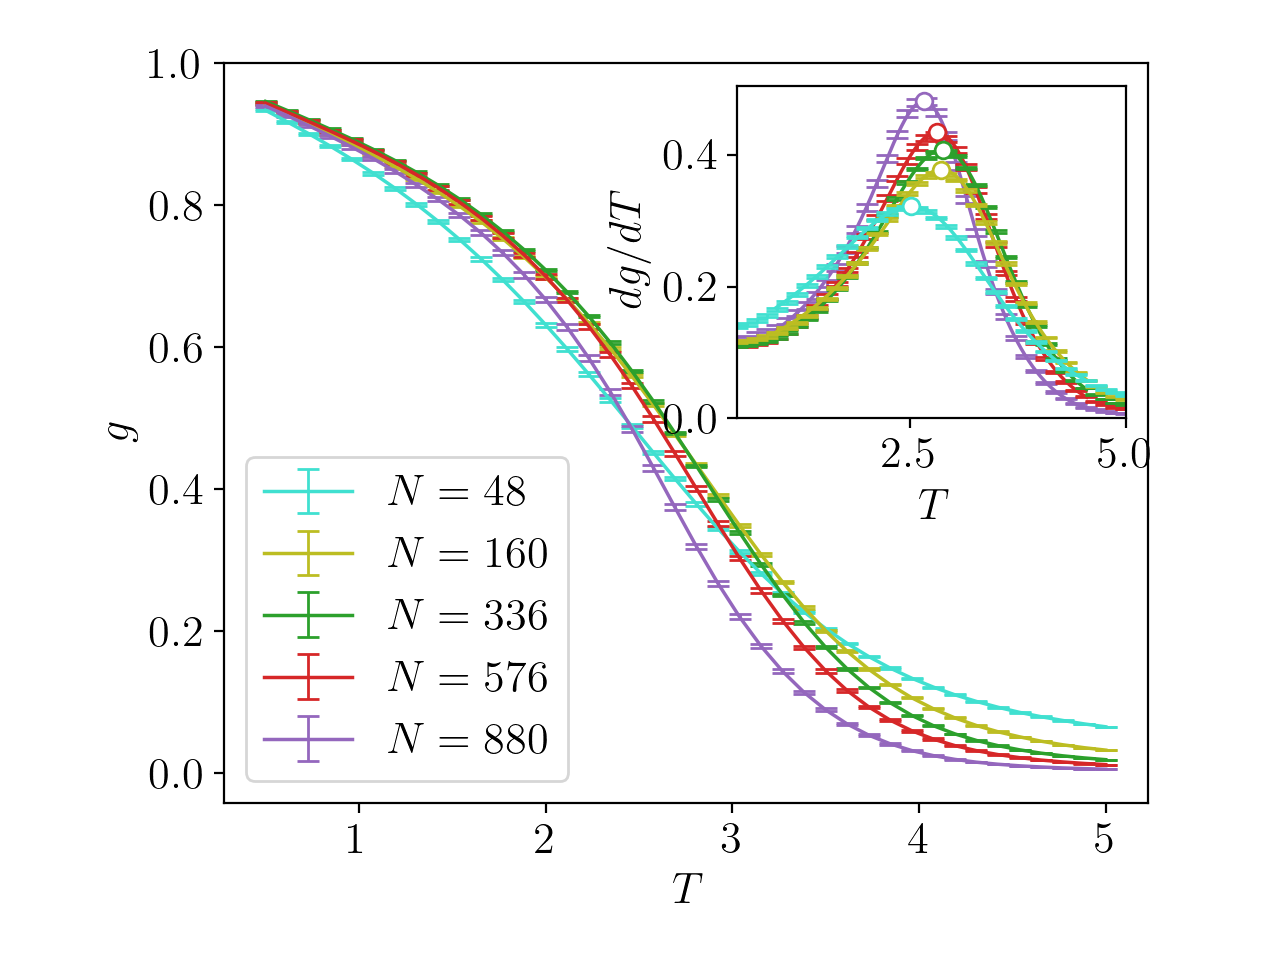

In [69]:
# Set figure parameters
aspect_ratio_g_and_dg_dT = 1
aspect_ratio_fits =  0.8
T0 = T_vs_size_best[0]
Tf = T_vs_size_best[-1]

# Plot binder cumulant with errors
fig, ax = plt.subplots()
for size_index in range(len(sizes)):
    ax.errorbar(T_vs_size_best[size_index], g_vs_size_best[size_index], yerr=error_vs_size_best[size_index], markerfacecolor="None", capsize=4, capthick=1,
                 elinewidth=1, label=f'$N=\;${sizes_vs_adj[adj_index][size_index]}', color=color_vs_size[size_index],linewidth=1.25)
ax.set_xlabel('$T$')
ax.set_ylabel("$g$")

# Plot derivative of binder cumulant with errors and pade fits
axins = inset_axes(ax, width="42%", height="45%", loc=1)
for size_index in reversed(range(len(sizes))):
    axins.errorbar(T_vs_size_best[size_index], -dg_dT_vs_size_best[size_index], yerr=error_dg_dT_vs_size_best[size_index],
                   linewidth=0, markerfacecolor="None", capsize=4, capthick=1,
                 elinewidth=1, color=color_vs_size[size_index])
    axins.plot(T_pade, -dg_dT_pade_array[size_index], color=color_vs_size[size_index],linewidth=1.25)
    axins.plot(T_c[size_index], -peak_height[size_index], 'o', color=color_vs_size[size_index], markerfacecolor='white',linewidth=1.25)
axins.set_xlabel('$T$')
# axins.set_ylabel("$dg/dT$", loc='top')
axins.set_ylabel("$dg/dT$")


ax.legend(loc='lower left')
ax.set_box_aspect(aspect_ratio_fits)
# ax.set_xlim([0.4, 1])
ax.set_ylim(top=1)
# axins.set_xlim([0.4, 1])
axins.set_ylim([0,  -peak_height[-1]*1.05 ])
# axins.set_yticks([0, 1, 2, 3])
# axins.set_xticks([0.4, 0.6,0.8,1])
fig.tight_layout()
# fig.show()
figs.export(f'g_and_g_pade_and_dg_dT_inset_adj={adjacencies[adj_index]}.pdf')

# [Figure 3] Finite size scaling of the characteristics of the derivative of the binder cumulant

In [104]:
MCS_N_config_condition = 'max_MCS_with_a_minimum_of_N_configs'
min_N_config = 1000
adj_index = 10 # Use 0 for fig. 2 and 10 for fig. 5

In [73]:
# Load calculated data
fname = f'Processed_Data/fss_dg_dT_adj={adjacencies[adj_index]}_add={add_vs_adj[adj_index]}' \
        f'_read_mode={MCS_N_config_condition}_min_N_config={min_N_config}.npz'
data = np.load(fname, allow_pickle=True)

Tc = data['Tc']
Tc_err = data['Tc_err']
inv_peak_height = data['inv_peak_height']
inv_peak_height_err = data['inv_peak_height_err']
peak_width = data['peak_width']
peak_width_err = data['peak_width_err']
Tc_inf = data['Tc_inf']
Tc_inf_err = data['Tc_inf_err']
inv_peak_height_inf = data['inv_peak_height_inf']
inv_peak_height_inf_err = data['inv_peak_height_inf_err']
peak_width_inf = data['peak_width_inf']
peak_width_inf_err = data['peak_width_inf_err']

### [Fig. 3]

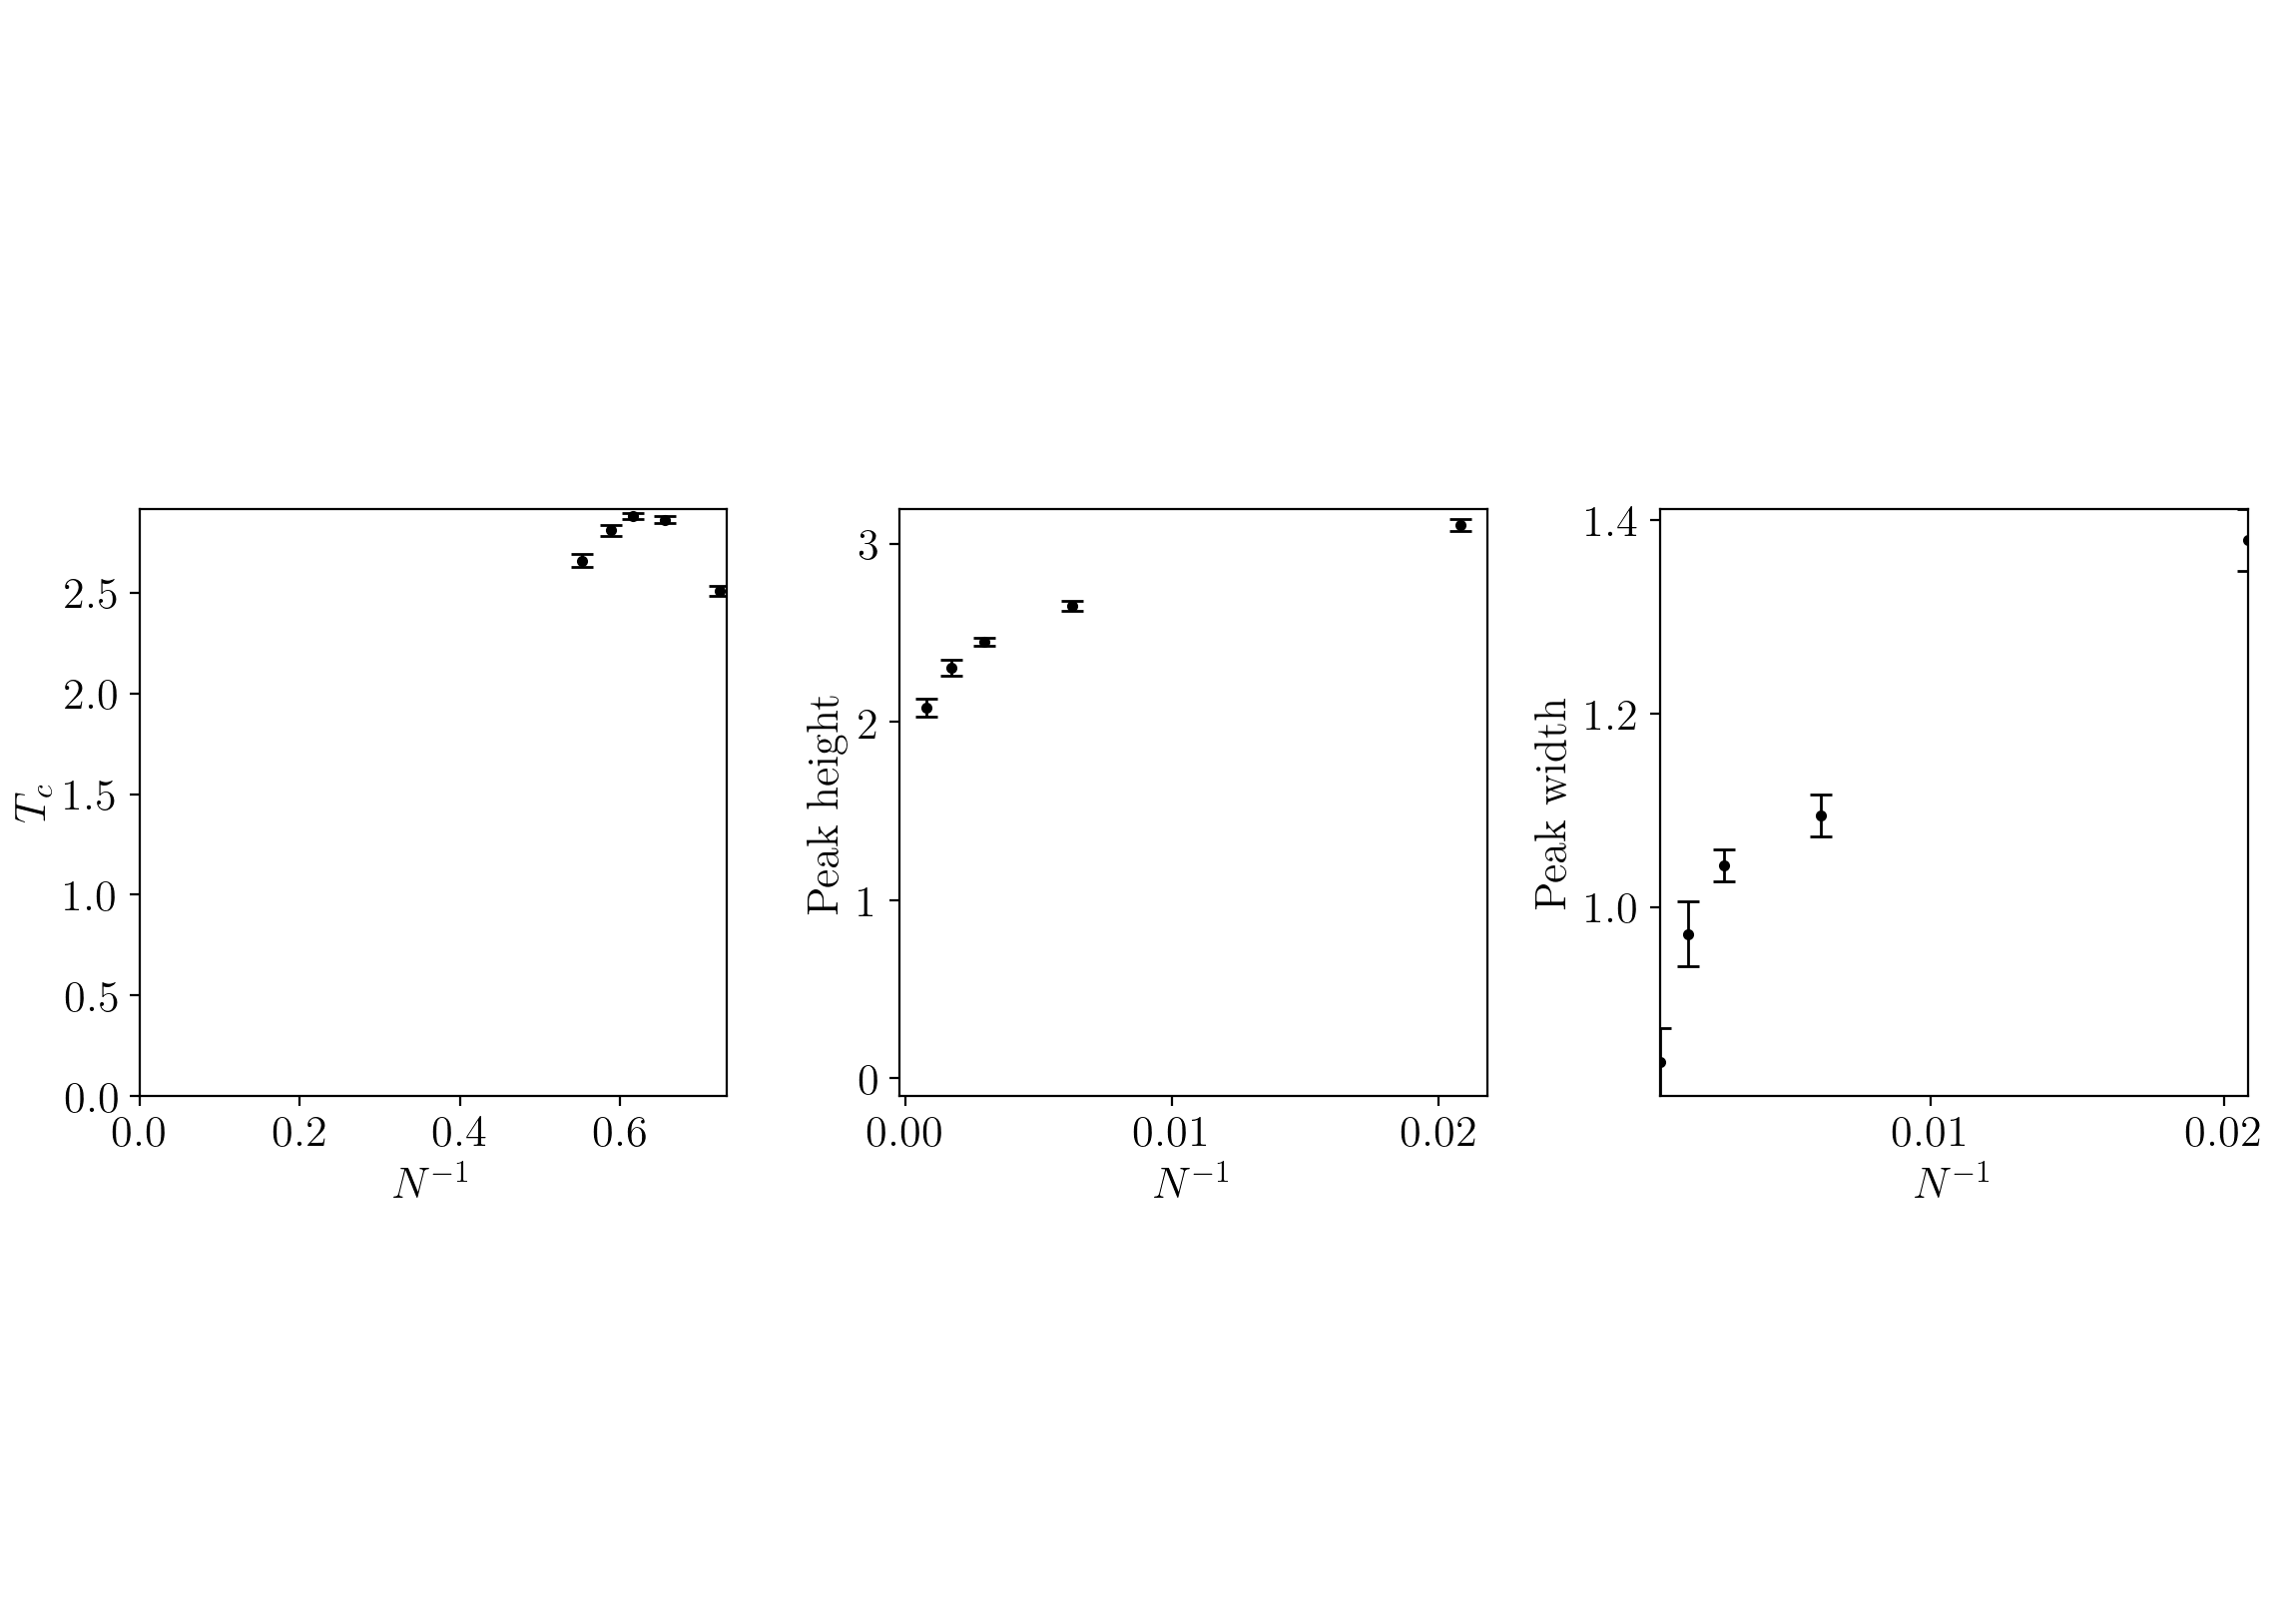

In [103]:
figsize_fits = [10*1.15, 7*1.15]
aspect_ratio_fits = 1
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=figsize_fits)

inv_sizes_fit = np.linspace(0, sizes_vs_adj[adj_index][0]**(-1/3), 100)
Tc_fit = np.poly1d(np.polyfit((np.array(sizes_vs_adj[adj_index])**(-1/3))[-2:], Tc[-2:],1))
inv_peak_height_fit = np.poly1d(np.polyfit((np.array(sizes_vs_adj[adj_index])**(-1/3))[-2:], inv_peak_height[-2:],1))
peak_with_fit = np.poly1d(np.polyfit((np.array(sizes_vs_adj[adj_index])**(-1/3))[-2:], peak_width[-2:],1))

ax1.plot(inv_sizes_fit, Tc_fit(inv_sizes_fit), "-", color = 'k')
ax1.set_xlabel('$N^{-1/3}$')
ax1.xaxis.set_label_coords(.88, -0.05)
ax1.set_xticks([0,0.05,0.1,0.15])
ax1.set_xlim(left=0)
ax1.set_ylabel("$T_c$")
ax1.set_title('(a)', y=-.3)

ax2.plot(inv_sizes_fit, -inv_peak_height_fit(inv_sizes_fit), "-", color = 'k')
ax2.set_xlabel('$N^{-1/3}$')
ax2.set_ylabel("Inverse peak height")
ax2.xaxis.set_label_coords(.88, -0.05)
ax2.set_xticks([0,0.05,0.1,0.15])
ax2.set_ylim(bottom=0)
ax2.set_xlim(left=0)
ax2.set_title('(b)', y=-.3)


ax3.plot(inv_sizes_fit, peak_with_fit(inv_sizes_fit), "-", color = 'k')
ax3.set_xlabel('$N^{-1/3}$')
ax3.set_ylabel("Peak width")
ax3.xaxis.set_label_coords(.88, -0.05)
ax3.set_xticks([0,0.05,0.1,0.15])
ax3.set_ylim(bottom=0)
ax3.set_xlim(left=0)
ax3.set_title('(c)', y=-.3)

ax1.errorbar(1 / np.array(sizes_vs_adj[adj_index] ) ** (1 / 3), Tc, yerr=Tc_err,
             marker="o", color = 'k', markersize=3, capsize=4, capthick=1, elinewidth=1, linewidth=0)

ax2.errorbar(1 / np.array(sizes_vs_adj[adj_index] ) ** (1 / 3), -inv_peak_height, yerr=inv_peak_height_err,
             marker="o", color = 'k', markersize=3, capsize=4, capthick=1, elinewidth=1, linewidth=0)

ax3.errorbar(1 / np.array(sizes_vs_adj[adj_index] ) ** (1 / 3), peak_width, yerr=peak_width_err,
             marker="o", color = 'k', markersize=3, capsize=4, capthick=1, elinewidth=1, linewidth=0)

ax1.set_title(f'{Tc_inf:.3f}$\pm${Tc_inf_err:.3f}')
ax2.set_title(f'{-inv_peak_height_inf:.3f}$\pm${inv_peak_height_inf_err:.3f}')
ax3.set_title(f'{peak_width_inf:.3f}$\pm${peak_width_inf_err:.3f}')

# [Figs. 4 and 6] Tc vs adjacency

In [105]:
# Load calculated data
# graphs = 'mean_field'  # Fig. 4
graphs = 'Dwave' # Fig. 6
fname = f'Processed_Data/Tc_vs_adj_{graphs}_read_mode={MCS_N_config_condition}_min_N_config={min_N_config}.npz'
data = np.load(fname, allow_pickle=True)

Tc_vs_adj = data['Tc_vs_adj']
Tc_err_vs_adj = data['Tc_err_vs_adj']
Tc_inf_vs_adj = data['Tc_inf_vs_adj']
Tc_inf_err_vs_adj = data['Tc_inf_err_vs_adj']

## [Fig. 4] Mean field vs theory

/tmp/ipykernel_43122/2661859609.py:6: RuntimeWarning: divide by zero encountered in divide
  y = np.tanh(x / Tc) ** 2 * np.exp(-0.5 * (x ** 2)) / np.sqrt(2 * np.pi)


[0.7479748  1.52355236 2.05640564 2.48574857]


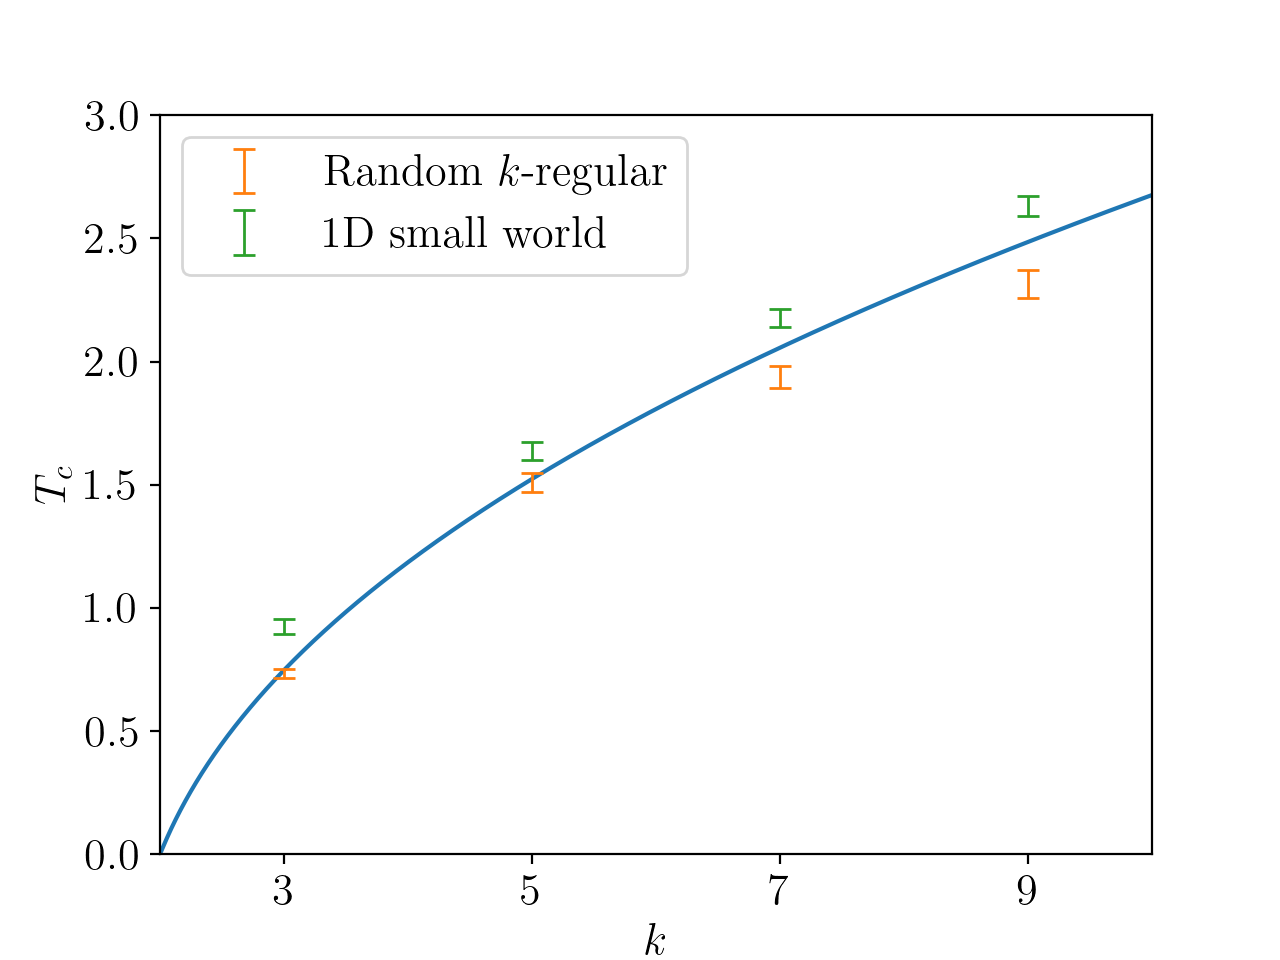

In [64]:
# %% RRG and 1D vs theory
Tc_x = np.linspace(0, 3, 10000)
x = np.linspace(-100, 100, 10000)
k = np.zeros([len(Tc_x)])
for i, Tc in enumerate(Tc_x):
    y = np.tanh(x / Tc) ** 2 * np.exp(-0.5 * (x ** 2)) / np.sqrt(2 * np.pi)
    k[i] = 1 / np.trapz(y, x)

fig, ax = plt.subplots(dpi=200)
ax.plot(k + 1, Tc_x)
ax.errorbar(np.array([3, 5, 7, 9]), Tc_inf_vs_adj[:4], Tc_inf_err_vs_adj[:4], label='Random $k$-regular', markerfacecolor="None", capsize=4, capthick=1,
                 elinewidth=1, linewidth=0)
ax.errorbar(np.array([3, 5, 7, 9]), Tc_inf_vs_adj[4:], Tc_inf_err_vs_adj[4:], label='1D small world', markerfacecolor="None", capsize=4, capthick=1,
                 elinewidth=1, linewidth=0)

ax.set_xticks([3, 5, 7, 9])
ks = [np.abs(k+1-ki).argmin() for ki in [3, 5, 7, 9]]
print(Tc_x[ks])

ax.set_xlim([2, 10])
ax.set_ylim([0, 3])
ax.legend()
ax.set_xlabel('$k$')
ax.set_ylabel('$T_c$')
figs.export(f'Random-regular and small-world vs theory.pdf')

# [Fig. 6] Tc vs adjacency: D-Wave

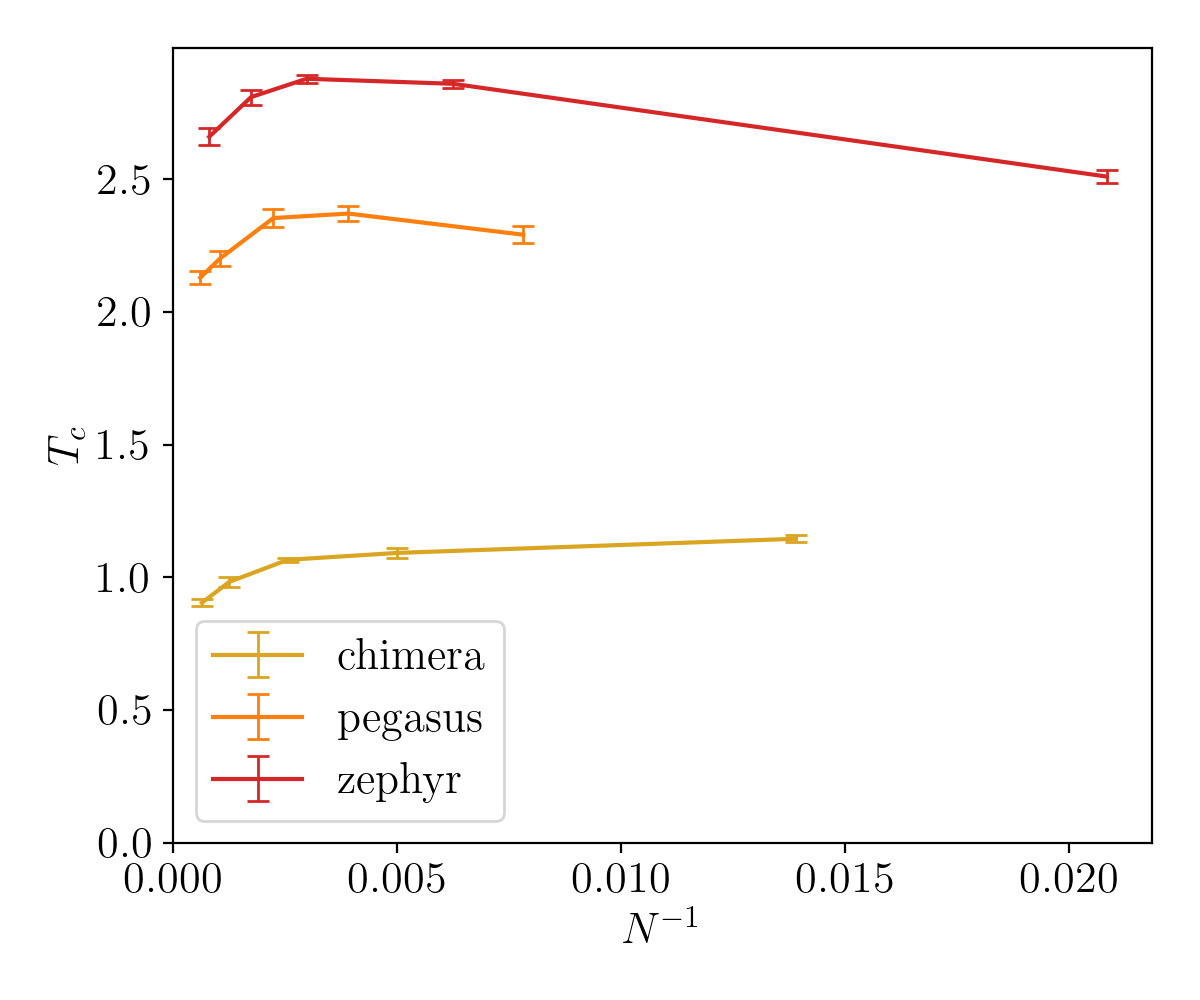

In [119]:
fig, ax1 = plt.subplots(figsize=[6,5])

for adj_index in range(len(adjacencies)-3, len(adjacencies)):
    ax1.errorbar(1/np.array(sizes_vs_adj[adj_index]), Tc_vs_adj[adj_index], yerr=Tc_err_vs_adj[adj_index],
                 label=rf'{adjacencies[adj_index]}', color=color_vs_adj[adj_index], markersize=3, capsize=4, capthick=1,elinewidth=1)

ax1.legend()
ax1.set_ylabel('$T_c$')
ax1.set_xlabel(r'$N^{-1}$')
ax1.set_ylim(bottom=0)
ax1.set_xlim(left=0)
fig.tight_layout()

figs.export(f'Tc_vs_adjacency_Dwave.pdf')

# [Fig. 8] Autocorrelation times

In [48]:
# Read autocorrelation time data vs adjacency
T_vs_adj = [[] for _ in range(len(adjacencies))]
tau_q2_T_vs_adj = [[] for _ in range(len(adjacencies))]
σ2_q2_bin_vs_adj = [[] for _ in range(len(adjacencies))]
adj_indices = adj_indices = adj_indices = [0, 9, 10, 11]

for adj_index in adj_indices:
    _, _, _, _, T_vs_adj[adj_index], _, _, _, _, _, σ2_q2_bin_vs_adj[adj_index] = \
        rfc.read_data(adjacencies[adj_index], distribution, sizes, add_vs_adj[adj_index], T0_Tf_vs_adj[adj_index][0],
        T0_Tf_vs_adj[adj_index][1], MCS_avg_0, [max_MCSs_vs_adj_binned[adj_index][:-1], _, _], data_type='binned')[:11]
    del T_vs_adj[adj_index][4], σ2_q2_bin_vs_adj[adj_index][4], sizes_vs_adj[adj_index][4]
del sizes[4]

random_regular_3
Binned data
zephyr
Binned data


In [6]:
# Calculate autocorrelation time
for adj_index in adj_indices:
    tau_q2_T_vs_adj[adj_index] = rfc.autocorrelation_time_q2(σ2_q2_bin_vs_adj[adj_index])

In [7]:
# Store calculated data
fname = f'Processed_Data/Autocorrelation_times_adjacencies={adj_indices}'
np.savez(fname, sizes=sizes, sizes_vs_adj=sizes_vs_adj, T_vs_adj=T_vs_adj, tau_q2_T_vs_adj=tau_q2_T_vs_adj,  allow_pickle=True)

/home/gabriel/anaconda3/envs/Architecture_v1/lib/python3.10/site-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


## [Fig. 8] Autocorrelation times
## Start here if you just want to load data

In [51]:
# Load calculated data
adj_indices = adj_indices = adj_indices = [0, 9, 10, 11]

fname = f'Processed_Data/Autocorrelation_times_adjacencies={adj_indices}.npz'
data = np.load(fname, allow_pickle=True)
sizes_load = data['sizes']
sizes_vs_adj_load = data['sizes_vs_adj']
T_vs_adj_load = data['T_vs_adj']
tau_q2_T_vs_adj_load = data['tau_q2_T_vs_adj']

In [52]:
# Calculate autocorrelation time fits
T_fit_tau_vs_adj, log_tau_fit_vs_adj, log_tau_vs_adj, T_tau_vs_adj = [ [[[] for _ in range(len(sizes))] for _ in range(len(adjacencies))] for _ in range(4)]
divide_by_size = True

for adj_index in adj_indices:
    for size_index in range(len(sizes_load)):
        fit_start_index = np.where(np.isfinite(tau_q2_T_vs_adj_load[adj_index][size_index]))[0][0]

        T = T_vs_adj_load[adj_index][size_index][-1][fit_start_index:]
        T_tau_vs_adj[adj_index][size_index] = T

        if divide_by_size:
            tau = tau_q2_T_vs_adj_load[adj_index][size_index][fit_start_index:]/sizes_vs_adj_load[adj_index][size_index]
        else:
            tau = tau_q2_T_vs_adj_load[adj_index][size_index][fit_start_index:]

        log_tau_vs_adj[adj_index][size_index] = np.log10(tau)

        T_fit_tau_vs_adj[adj_index][size_index] = np.linspace(T[0], T[-1], 1000)
        log_tau_fit_vs_adj[adj_index][size_index] = np.poly1d(np.polyfit(T, log_tau_vs_adj[adj_index][size_index], 10))(T_fit_tau_vs_adj[adj_index][size_index])

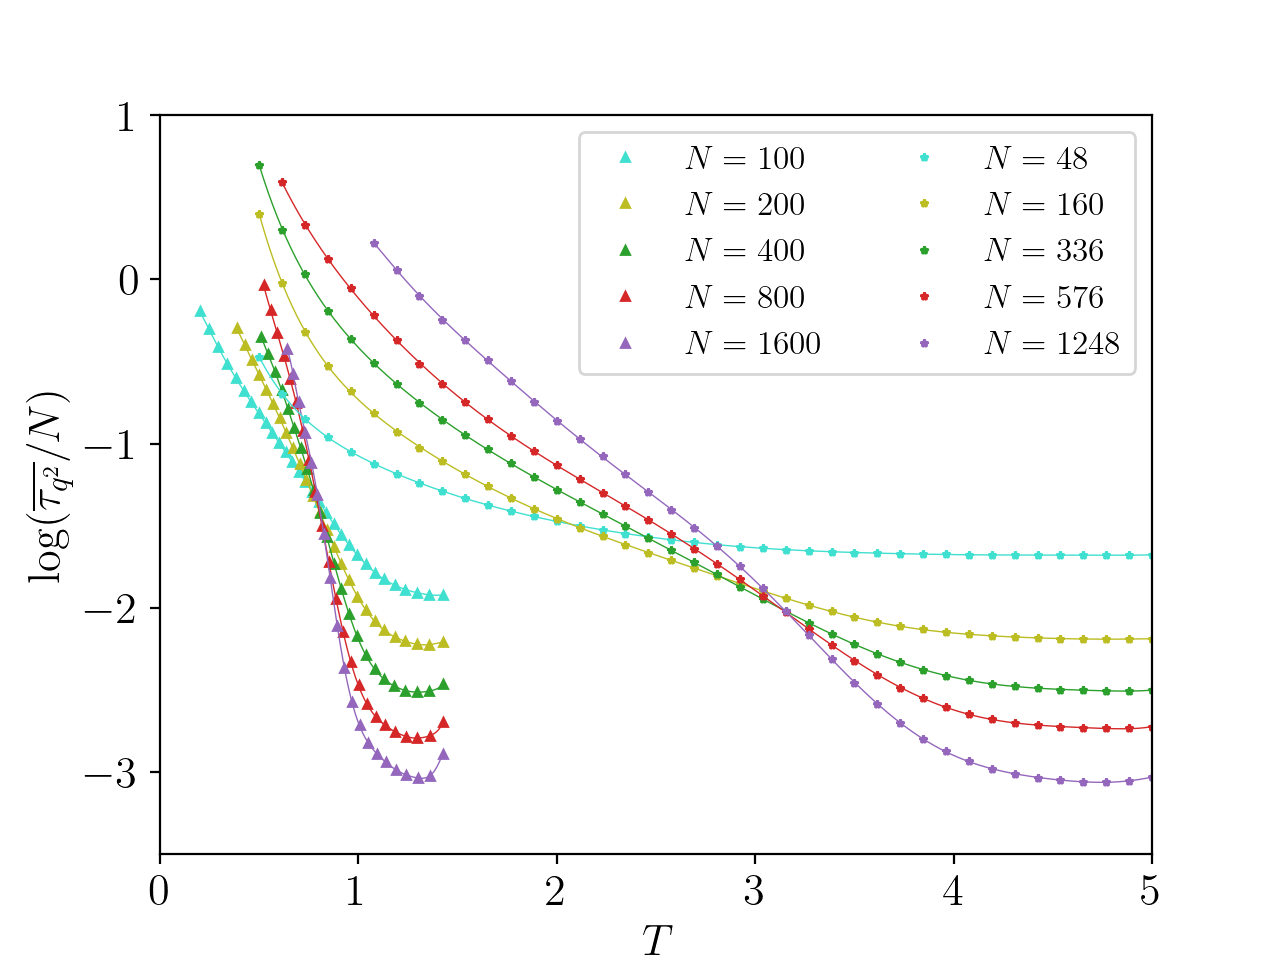

In [61]:
#Plot autocorrelation time
fig, ax = plt.subplots()
for adj_index in adj_indices:
    for size_index in range(len(sizes)):

        ax.plot(T_tau_vs_adj[adj_index][size_index], log_tau_vs_adj[adj_index][size_index],
                color=color_vs_size[size_index], marker=marker_adjacencies[adj_index], linewidth=0, markersize=3, label=f'$N=\;${sizes_vs_adj[adj_index][size_index]}')
        ax.plot(T_fit_tau_vs_adj[adj_index][size_index], log_tau_fit_vs_adj[adj_index][size_index], color=color_vs_size[size_index], linewidth=0.5)

    # ax.set_title(adjacencies[adj_index])
    ax.set_xlabel('$T$')

    if divide_by_size:
        ax.set_ylim([-3.5, 1])
        ax.set_xlim([0, 5])
    else:
        ax.set_ylim([-0.1, 3.5])
        ax.set_xlim([0, 5])

if divide_by_size:
    ax.set_ylabel(r'$\log(\overline{\tau_{q^2}}/N)$')
else:
    ax.set_ylabel(r'$\log(\overline{\tau_{q^2}})$')


ax.legend(fontsize=12, ncol=2)
figs.export(f'Autocorrelation_time_rrg_3_vs_zephyr.pdf')

## [Inset Fig. 8] Autocorrelation times scaling
## Start here if you just want to load data

In [8]:
# Load calculated data
adj_indices = adj_indices = [0, 9, 10, 11]
fname = f'Processed_Data/Autocorrelation_times_adjacencies={adj_indices}.npz'
data = np.load(fname, allow_pickle=True)
sizes_load = data['sizes']
sizes_vs_adj_load = data['sizes_vs_adj']
T_vs_adj_load = data['T_vs_adj']
tau_q2_T_vs_adj_load = data['tau_q2_T_vs_adj']

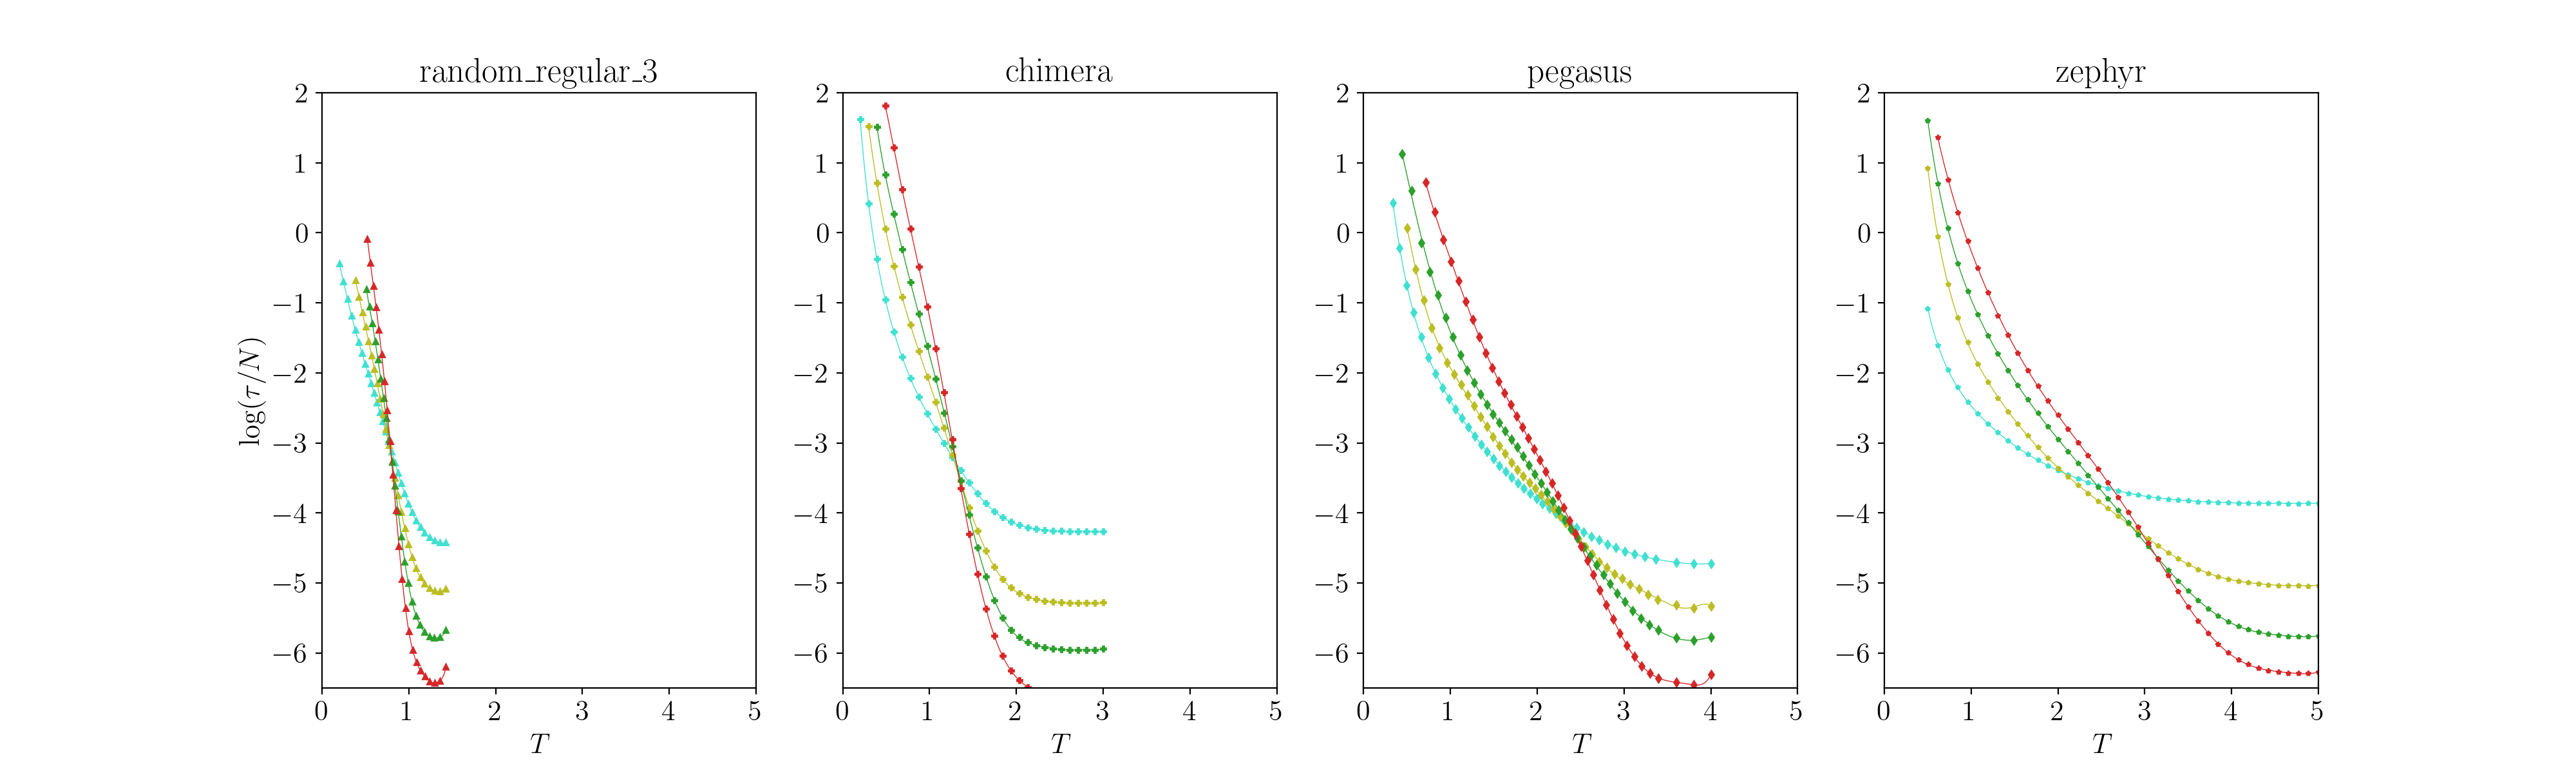

In [16]:
# %% BINNED DATA ONLY Calculate autocorrelation time fits
T_fit_tau_vs_adj, log_tau_fit_vs_adj, log_tau_vs_adj, T_tau_vs_adj = [ [[[] for _ in range(len(sizes))] for _ in range(len(adjacencies))] for _ in range(4)]
divide_by_size = True

for adj_index in adj_indices:
    for size_index in range(len(sizes)):
        fit_start_index = np.where(np.isfinite(tau_q2_T_vs_adj[adj_index][size_index]))[0][0]

        T = T_vs_adj[adj_index][size_index][-1][fit_start_index:]
        T_tau_vs_adj[adj_index][size_index] = T

        if divide_by_size:
            tau = tau_q2_T_vs_adj[adj_index][size_index][fit_start_index:]/sizes_vs_adj[adj_index][size_index]
        else:
            tau = tau_q2_T_vs_adj[adj_index][size_index][fit_start_index:]

        log_tau_vs_adj[adj_index][size_index] = np.log(tau)

        T_fit_tau_vs_adj[adj_index][size_index] = np.linspace(T[0], T[-1], 1000)
        log_tau_fit_vs_adj[adj_index][size_index] = np.poly1d(np.polyfit(T, log_tau_vs_adj[adj_index][size_index], 10))(T_fit_tau_vs_adj[adj_index][size_index])

# %% BINNED DATA ONLY Plot autocorrelation time
fig, ax = plt.subplots(ncols=4, figsize=[20, 6])
for i, adj_index in enumerate(adj_indices):
    for size_index in range(len(sizes)):
        ax[i].plot(T_tau_vs_adj[adj_index][size_index], log_tau_vs_adj[adj_index][size_index],
                color=color_vs_size[size_index], marker=marker_adjacencies[adj_index], linewidth=0, markersize=3)
        ax[i].plot(T_fit_tau_vs_adj[adj_index][size_index], log_tau_fit_vs_adj[adj_index][size_index], color=color_vs_size[size_index], linewidth=0.5)

    ax[i].set_title(adjacencies[adj_index])
    ax[i].set_xlabel('$T$')

    if divide_by_size:
        ax[i].set_ylim([-6.5, 2])
        ax[i].set_xlim([0, 5])
    else:
        ax[i].set_ylim([-0.1, 3.5])
        ax[i].set_xlim([0, 5])

if divide_by_size:
    ax[0].set_ylabel(r'$\log(\tau/N)$')
else:
    ax[0].set_ylabel(r'$\log(\tau)$')


In [ ]:
# %% BINNED DATA ONLY Calculate autocorrelation time vs size for different temperatures
Ts = np.linspace(0.5, 5, 10)
log_tau_vs_size_for_specific_T_vs_adj = [[[] for _ in range(len(Ts))] for _ in range(len(adjacencies))]

for adj_index in adj_indices:
    for size_index in range(len(sizes)):
        for T_fit_index, T in enumerate(Ts):
            if np.any(np.abs(T_fit_tau_vs_adj[adj_index][size_index]-T) < 0.1):
                T_index = np.where(np.abs(T_fit_tau_vs_adj[adj_index][size_index]-T) == np.abs(T_fit_tau_vs_adj[adj_index][size_index]-T).min())[0][0]
                log_tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index].append(log_tau_fit_vs_adj[adj_index][size_index][T_index])
            else:
                log_tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index].append(np.nan)

# %% Define scaling law for tau(T) vs N
def scaling_law_manuel(x,a,b, c):
     # scaling law for log(tau) = f(log(N))
     # This corresponds to tau = N^a * e^(bN)
    # return a*x + 0*b*np.exp(c*x) + c
    return 0*a*x + b*np.exp(c*x)

def scaling_law(x, a, b):
    return a**x*np.exp(b*x)

# %% BINNED DATA ONLY Plot autocorrelation time vs size for different temperatures
fit_params_log_tau_vs_size_for_specific_T_vs_adj = [[[] for _ in range(len(Ts))] for _ in range(len(adjacencies))]

colors_autocorrelation = plt.get_cmap('plasma')(np.linspace(0, 255, len(Ts)).astype('int'))
fig, ax = plt.subplots(ncols=4, figsize=[26, 6])

for i, adj_index in enumerate(adj_indices):
    for T_fit_index, T in enumerate(Ts):

        log_tau_vs_size = log_tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index]
        # Print in log log
        ax[i].plot(np.log(sizes_vs_adj[adj_index]), log_tau_vs_size, color=colors_autocorrelation[T_fit_index], linewidth=0, marker=marker_adjacencies[adj_index], markersize=3)
        # Print in linear
        # ax[i].plot(sizes_vs_adj[adj_index], np.exp(log_tau_vs_size), color=colors_autocorrelation[T_fit_index], linewidth=0, marker=marker_adjacencies[adj_index], markersize=3)
        try:
            non_thermalized_index = np.where(~np.isnan(log_tau_vs_size))[0][-1]

            # log(tau) = A + B*log(N)
            # params = np.polyfit(np.log(sizes_vs_adj[adj_index][:non_thermalized_index+1]), log_tau_vs_size[:non_thermalized_index+1], 1)
            # N0 = np.log(sizes_vs_adj[adj_index][:non_thermalized_index+1])[0]
            # Nf = np.log(sizes_vs_adj[adj_index][:non_thermalized_index+1])[-1]
            # sizes_fit = np.linspace(N0, Nf, 100)
            # ax[i].plot(sizes_fit, np.poly1d(params)(sizes_fit), color=colors_autocorrelation[T_fit_index], linewidth=1)

            # scaling law manuel
            params = curve_fit(scaling_law_manuel, np.log(sizes_vs_adj[adj_index][:non_thermalized_index+1]), log_tau_vs_size[:non_thermalized_index+1])[0]
            N0 = np.log(sizes_vs_adj[adj_index][:non_thermalized_index+1])[0]
            Nf = np.log(sizes_vs_adj[adj_index][:non_thermalized_index+1])[-1]
            sizes_fit = np.linspace(N0, Nf, 100)
            ax[i].plot(sizes_fit, scaling_law_manuel(sizes_fit, *params), color=colors_autocorrelation[T_fit_index], linewidth=1)

            #
            # params = curve_fit(scaling_law, sizes_vs_adj[adj_index][:non_thermalized_index+1], np.exp(log_tau_vs_size[:non_thermalized_index+1]))[0]
            # N0 = sizes_vs_adj[adj_index][:non_thermalized_index+1][0]
            # Nf = sizes_vs_adj[adj_index][:non_thermalized_index+1][-1]
            # sizes_fit = np.linspace(N0, Nf, 100)
            # ax[i].plot(np.log(sizes_fit), np.log(scaling_law(sizes_fit, *params)), color=colors_autocorrelation[T_fit_index], linewidth=1)

            fit_params_log_tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index] = params.copy()
        except:
            fit_params_log_tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index] = np.zeros([len(fit_params_log_tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index-1])])

    ax[i].set_title(adjacencies[adj_index])
    ax[i].set_xlabel(r'$\log(N)$')
    # ax[i].set_yscale('log', base=10)
    # ax[i].set_ylim([-0.1, 3.5])
    # ax[i]. set_xlim([4e1,2e3])
    # ax[i].set_xscale('log', base=10)

if divide_by_size:
    ax[0].set_ylabel(r'$\log(\tau/N)$')
else:
    ax[0].set_ylabel(r'$\log(\tau)$')
# fig.suptitle(f'$\\alpha={alpha}$')
figs.colorbar_for_lines(fig, Ts[::2].round(1))
fig.show()

# %% BINNED DATA ONLY Plot fit params of autocorrelation time vs size
fig, ax = plt.subplots()

for i, adj_index in enumerate(adj_indices):
    params = np.array(fit_params_log_tau_vs_size_for_specific_T_vs_adj[adj_index])
    params[params == 0] = np.nan
    ax.plot(Ts, params[:, 0], marker=marker_adjacencies[adj_index], markersize=4, linewidth=1, color='b', label=f'A(T), {adjacencies[adj_index]}')
    ax.plot(Ts, params[:, 1], marker=marker_adjacencies[adj_index], markersize=4, linewidth=1, color='r', label=f'B(T), {adjacencies[adj_index]}')
    # ax.plot(Ts, 10**(params[:, 1]), marker = marker_adjacencies[adj_index])

ax.legend(fontsize=8, ncols=3)
fig.suptitle(r'$ \tau(N) \propto N^{A(T)}e^{B(T)N}$')
ax.set_yscale('log')
ax.set_ylabel(r'$A(T),B(T)$')
ax.set_xlabel(r'$T$')
fig.show()

# Thermal equilibrium tests
### Logarithmic binning $[<q^2>]$ for rrg3 n=800

In [35]:
# Read data
adj_index = 3
data_type = 'all'

MCS_avg_vs_size, N_configs_vs_size, copies_vs_size, labels_vs_size, T_vs_size, q2_vs_size, q4_vs_size, \
ql_vs_size, U_vs_size, U2_vs_size, σ2_q2_bin_vs_size, σ2_q4_bin_vs_size, q_dist_vs_size, g_vs_size, \
g_bootstrap_vs_size, error_vs_size = rfc.read_data(adjacencies[adj_index], distribution, sizes, add_vs_adj[adj_index], T0_Tf_vs_adj[adj_index][0], T0_Tf_vs_adj[adj_index][1], MCS_avg_0,
                                                   [max_MCSs_vs_adj_binned[adj_index],max_MCSs_vs_adj_old[adj_index], max_MCSs_vs_adj_fast[adj_index]], data_type)

random_regular_9
Old data
Binned data
100 20000 20010
1600 20000 1539
200 40000 24615
1600 40000 1539
200 10000 24615
1600 10000 1539


KeyboardInterrupt: 

In [ ]:
# Define temperatures and sizes for the plots
size_index = -3 # N=800
T_index_0 = 10
copies = copies_vs_size[-1][-1]
T_indices = np.linspace(T_index_0, copies - 2, n_temps, dtype='int')

# Plot and save figure
fig, ax = plt.subplots()
n_conf = len(labels_vs_size[size_index][0])
n_MCS = len(MCS_avg_vs_size[size_index])

error_N = np.zeros([n_conf, n_MCS - 1, copies])
for k, label in enumerate(labels_vs_size[size_index][0]):
    for i in reversed(range(n_MCS)):
        index = np.where(labels_vs_size[size_index][i] == label)[0][0]
        if i == n_MCS - 1:
            q2_converged = q2_vs_size[size_index][i][index]
        else:
            error_N[k, i] = q2_converged - q2_vs_size[size_index][i][index]

fig, ax = plt.subplots(dpi=200)
x = MCS_avg_0 * 2 ** np.arange(n_MCS - 1)
for T_index in T_indices:
    ax.errorbar(np.arange(n_MCS - 1), error_N.mean(0)[::-1, T_index],
                yerr=error_N.std(0)[::-1, T_index] / np.sqrt(n_conf),
                color=colors_temps[np.where(T_index == T_indices)[0][0]], linewidth=1)

# ax.set_ylabel(r'$\delta \: q^2_n$')
ax.set_title(r'$\delta \: q^2_n$')
ax.set_xlabel(r'$n$')
figs.colorbar_for_lines(fig, T_vs_size[size_index][0][T_indices].round(2), label='$T$', location='top')
fig.tight_layout()
fig.show()
figs.export(f'thermal_equilibrium_logarithmic_binning_q2_adj={adjacencies[adj_index]}_n={sizes_vs_adj[adj_index][size_index]}.pdf')

### Cluster link overlap for rrg3 n=800
USE data_type='binned', I USED A DIFERENT DEFINITION OF ENERGY IN OLD DATA

In [ ]:
# Read data, not necessary if you are using the same adjacency and same type of data ('fast', 'old' or 'binned')
adj_index = 0 # 1D add 3
data_type = 'binned'


MCS_avg_vs_size, N_configs_vs_size, copies_vs_size, labels_vs_size, T_vs_size, q2_vs_size, q4_vs_size, \
ql_vs_size, U_vs_size, U2_vs_size, σ2_q2_bin_vs_size, σ2_q4_bin_vs_size, q_dist_vs_size, g_vs_size, \
g_bootstrap_vs_size, error_vs_size = rfc.read_data(adjacencies[adj_index], distribution, sizes, add_vs_adj[adj_index], T0_Tf_vs_adj[adj_index][0], T0_Tf_vs_adj[adj_index][1], MCS_avg_0,
                                                   [max_MCSs_vs_adj_binned[adj_index],max_MCSs_vs_adj_old[adj_index], max_MCSs_vs_adj_fast[adj_index]], data_type)

In [ ]:
# Define temperatures and sizes for the plots
size_index = -3 # N=800
T_index_0 = 10
copies = copies_vs_size[-1][-1]
T_indices = np.linspace(T_index_0, copies - 2, n_temps, dtype='int')

# Plot and save figures
fig, ax = plt.subplots()
T = T_vs_size[size_index][0]
n_MCS = len(MCS_avg_vs_size[size_index])
n_conf = np.array(N_configs_vs_size[size_index]).max()

cluster_link_convergence = np.zeros([n_MCS, copies])
for MCS_index in range(n_MCS):
    U = U_vs_size[size_index][MCS_index].mean(0)
    ql = ql_vs_size[size_index][MCS_index].mean(0)
    cluster_link_convergence[MCS_index] = 1 - T * np.abs(U) / 1.5 - ql

fig, ax = plt.subplots(dpi=200)
for T_index in T_indices:
    ax.plot(np.arange(n_MCS), cluster_link_convergence[::-1, T_index], '.-',
            color=colors_temps[np.where(T_index == T_indices)[0][0]], linewidth=1)

figs.colorbar_for_lines(fig, T_vs_size[size_index][0][T_indices].round(2), label='$T$', location='top')

ax.set_title(fr'$1-T|U|/c -q_l$')
ax.set_xlabel(r'$n$')
fig.tight_layout()
fig.show()
figs.export(f'thermal_equilibrium_cluster_link_overlap_adj={adjacencies[adj_index]}_n={sizes_vs_adj[adj_index][size_index]}.pdf')

### Thermalization error and autocorrelation time
Use data_type='binned'

In [ ]:
# Read data, not necessary if you are using the same adjacency and same type of data ('fast', 'old' or 'binned')
adj_index = -1 # zephyr

MCS_avg_vs_size, N_configs_vs_size, copies_vs_size, labels_vs_size, T_vs_size, q2_vs_size, q4_vs_size, \
ql_vs_size, U_vs_size, U2_vs_size, σ2_q2_bin_vs_size, σ2_q4_bin_vs_size, q_dist_vs_size, g_vs_size, \
g_bootstrap_vs_size, error_vs_size = rfc.read_data(adjacencies[adj_index], distribution, sizes, add_vs_adj[adj_index], T0_Tf_vs_adj[adj_index][0], T0_Tf_vs_adj[adj_index][1], MCS_avg_0,
                                                   [max_MCSs_vs_adj_binned[adj_index],max_MCSs_vs_adj_old[adj_index], max_MCSs_vs_adj_fast[adj_index]], data_type ='binned')

In [ ]:
# Define temperatures and sizes for the plots
size_index = -1
T_index_0 = 10
copies = copies_vs_size[-1][-1]
T_indices = np.linspace(T_index_0, copies - 2, n_temps, dtype='int')

# Plot and save figures
error_q2_T_vs_size = np.zeros([len(sizes), copies])
tau_q2_T_vs_size = np.zeros([len(sizes), copies])

size = sizes_vs_adj[adj_index][size_index]
σ2_q2_bin_t = σ2_q2_bin_vs_size[size_index][-1]
MCS_avg = MCS_avg_vs_size[size_index][-1]

fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=[10, 4], dpi=150)

for T_index in range(σ2_q2_bin_t.shape[-1]):
    σ2_q2_bin_c = σ2_q2_bin_t.mean(0)[:, T_index]
    M0 = MCS_avg
    n_bins = σ2_q2_bin_c.shape[0]
    bins = np.arange(n_bins)
    M_bin = [M0 / 2 ** bin for bin in bins]

    error = np.array([np.sqrt((1 / M) * sigma) for M, sigma in zip(M_bin, σ2_q2_bin_c)])
    error_q2_T_vs_size[size_index, T_index] = np.max(error)

    M = 2 ** bins
    tau = M * σ2_q2_bin_c[bins] / σ2_q2_bin_c[0]
    tau_q2_T_vs_size[size_index, T_index] = tau.max()

    n_bin_bias = np.arange(n_bins - 1)
    M_bias = 2 ** n_bin_bias
    tau_bias = (4 * M_bias * σ2_q2_bin_c[n_bin_bias + 1] - M_bias * σ2_q2_bin_c[n_bin_bias]) / σ2_q2_bin_c[0]

    if np.any(T_index == T_indices):
        ax1.plot(2 ** bins, error, '.-', color=colors_temps[np.where(T_index == T_indices)[0][0]])
        ax2.plot(M, tau, '.-', color=colors_temps[np.where(T_index == T_indices)[0][0]])
        # ax2.plot(M_bias, tau_bias,'.-', color=colors_temps[np.where(T_index == T_indices)[0][0]])

ax1.set_yscale('log')
ax1.set_xscale('log')
# ax1.set_title(r'Conf. avg. of the error of the thermal avg. of ${q^2}$')
ax1.set_title(r'$\overline{\Delta_{q^2}}$')
# ax1.set_xlabel(r'$M=$ Measurements per bin')
ax1.set_xlabel(r'$M_n$')

ax2.set_xscale('log')
ax2.set_yscale('log')
# ax2.set_title(r'Conf. avg. of the autocorrelation time of $q^2$')
ax2.set_title(r'$\overline{\tau_{q^2}}$')
# ax2.set_xlabel(r'$M=$ Measurements per bin')
ax2.set_xlabel(r'$M_n$')

figs.colorbar_for_lines(fig, T_vs_size[size_index][0][T_indices].round(2), label='$T$', location='top')
fig.tight_layout()
fig.show()
figs.export(f'thermal_equilibrium_autocorrelation_time_and_thermalization_error_adj={adjacencies[adj_index]}_n={sizes_vs_adj[adj_index][size_index]}.pdf')

## Autocorrelation time vs size for different temperatures vs adjacencies

In [ ]:
divide_by_size = False
Ts = np.linspace(0.5, 5, 5)

# %% BINNED DATA ONLY Read autocorrelation time data vs adjacency
T_vs_adj = [[] for _ in range(len(adjacencies))]
tau_q2_T_vs_adj = [[] for _ in range(len(adjacencies))]
σ2_q2_bin_vs_adj = [[] for _ in range(len(adjacencies))]
adj_indices = [9, 10, 11]
for adj_index in adj_indices:
    _, _, _, _, T_vs_adj[adj_index], _, _, _, _, _, σ2_q2_bin_vs_adj[adj_index] = \
    rfc.read_data(adjacencies[adj_index], distribution, sizes, add_vs_adj[adj_index], T0_Tf_vs_adj[adj_index][0],
                  T0_Tf_vs_adj[adj_index][1], MCS_avg_0, [max_MCSs_vs_adj_binned[adj_index][:-1], _, _],
                  data_type='binned')[:11]

del T_vs_adj[adj_index][4], σ2_q2_bin_vs_adj[adj_index][4], sizes_vs_adj[adj_index][4]
del sizes[4]
for adj_index in adj_indices:
    tau_q2_T_vs_adj[adj_index] = rfc.autocorrelation_time_q2(σ2_q2_bin_vs_adj[adj_index])

# %% BINNED DATA ONLY Calculate autocorrelation time fits
T_fit_tau_vs_adj, log_tau_fit_vs_adj, log_tau_vs_adj, T_tau_vs_adj = [ [[[] for _ in range(len(sizes))] for _ in range(len(adjacencies))] for _ in range(4)]


for adj_index in adj_indices:
    for size_index in range(len(sizes)):
        fit_start_index = np.where(np.isfinite(tau_q2_T_vs_adj[adj_index][size_index]))[0][0]

        T = T_vs_adj[adj_index][size_index][-1][fit_start_index:]
        T_tau_vs_adj[adj_index][size_index] = T

        if divide_by_size:
            tau = tau_q2_T_vs_adj[adj_index][size_index][fit_start_index:] / sizes_vs_adj[adj_index][size_index]
        else:
            tau = tau_q2_T_vs_adj[adj_index][size_index][fit_start_index:]

        log_tau_vs_adj[adj_index][size_index] = np.log10(tau)

        T_fit_tau_vs_adj[adj_index][size_index] = np.linspace(T[0], T[-1], 1000)
        log_tau_fit_vs_adj[adj_index][size_index] = np.poly1d(np.polyfit(T, log_tau_vs_adj[adj_index][size_index], 10))(
            T_fit_tau_vs_adj[adj_index][size_index])

# %% BINNED DATA ONLY Calculate autocorrelation time vs size for different temperatures
tau_vs_size_for_specific_T_vs_adj = [[[] for _ in range(len(Ts))] for _ in range(len(adjacencies))]

for adj_index in adj_indices:
    for size_index in range(len(sizes)):
        for T_fit_index, T in enumerate(Ts):
            if np.any(np.abs(T_fit_tau_vs_adj[adj_index][size_index] - T) < 0.1):
                T_index = np.where(np.abs(T_fit_tau_vs_adj[adj_index][size_index] - T) == np.abs(
                    T_fit_tau_vs_adj[adj_index][size_index] - T).min())[0][0]
                tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index].append(
                    log_tau_fit_vs_adj[adj_index][size_index][T_index])
            else:
                tau_vs_size_for_specific_T_vs_adj[adj_index][T_fit_index].append(np.nan)


### Probability distribution of q
Use data_type='binned'

In [ ]:
# Read data, not necessary if you are using the same adjacency and same type of data ('fast', 'old' or 'binned') as in previous cell
adj_index = 0 # zephyr
data_type = 'binned'


MCS_avg_vs_size, N_configs_vs_size, copies_vs_size, labels_vs_size, T_vs_size, q2_vs_size, q4_vs_size, \
ql_vs_size, U_vs_size, U2_vs_size, σ2_q2_bin_vs_size, σ2_q4_bin_vs_size, q_dist_vs_size, g_vs_size, \
g_bootstrap_vs_size, error_vs_size = rfc.read_data(adjacencies[adj_index], distribution, sizes, add_vs_adj[adj_index], T0_Tf_vs_adj[adj_index][0], T0_Tf_vs_adj[adj_index][1], MCS_avg_0,
                                                   [max_MCSs_vs_adj_binned[adj_index],max_MCSs_vs_adj_old[adj_index], max_MCSs_vs_adj_fast[adj_index]], data_type)

In [ ]:
MCS_index = -1
size_index = 3
replica_index = 54
T_index_0 = 10
copies = copies_vs_size[-1][-1]
T_indices = np.linspace(T_index_0, copies - 2, n_temps, dtype='int')

dist = np.linspace(-1, 1, q_dist_vs_size[-1][-1].shape[1])

fig, ax = plt.subplots(ncols=1, figsize=[6, 4], dpi=150)
q_dist = q_dist_vs_size[size_index][MCS_index]
for T_index in range(copies):
    q_dist_T = q_dist[replica_index, :, T_index]
    q_dist_T = q_dist_T / q_dist_T.max()
    if np.any(T_index == T_indices):
        ax.plot(dist, q_dist_T, '.-', color=colors_temps[np.where(T_index == T_indices)[0][0]])
ax.set_title(r'$P(q)$')
ax.set_xlabel(r'$q$')
figs.colorbar_for_lines(fig, T_vs_size[size_index][0][T_indices].round(2), label='$T$', location='top')
fig.tight_layout()
fig.show()
figs.export(f'thermal_equilibrium_probability_distribution_q_adj={adjacencies[adj_index]}_n={sizes_vs_adj[adj_index][size_index]}.pdf')

### Skewness of q
Use data_type='binned'

In [ ]:
# Read data, not necessary if you are using the same adjacency and same type of data ('fast', 'old' or 'binned') as in previous cell
adj_index = 0
data_type = 'all'

MCS_avg_vs_size, N_configs_vs_size, copies_vs_size, labels_vs_size, T_vs_size, q2_vs_size, q4_vs_size, \
ql_vs_size, U_vs_size, U2_vs_size, σ2_q2_bin_vs_size, σ2_q4_bin_vs_size, q_dist_vs_size, g_vs_size, \
g_bootstrap_vs_size, error_vs_size = rfc.read_data(adjacencies[adj_index], distribution, sizes, add_vs_adj[adj_index], T0_Tf_vs_adj[adj_index][0], T0_Tf_vs_adj[adj_index][1], MCS_avg_0,
                                                   [max_MCSs_vs_adj_binned[adj_index],max_MCSs_vs_adj_old[adj_index], max_MCSs_vs_adj_fast[adj_index]], data_type)


In [ ]:
# Plot and save figures
dist = np.linspace(-1, 1, q_dist_vs_size[-1][-1].shape[1])
fig, ax = plt.subplots(ncols=1, figsize=[6, 4], dpi=150)

for size_index in range(len(sizes)):
    MCS_index = len(MCS_avg_vs_size[size_index]) - 1
    q_dist = q_dist_vs_size[size_index][MCS_index]
    n_replicas = q_dist.shape[0]
    copies = copies_vs_size[size_index][0]
    skewness = np.zeros([copies, n_replicas])

    for T_index in range(copies):
        for replica_index in range(n_replicas):
            q_dist_T = q_dist[replica_index, :, T_index]
            # skewness[T_index, replica_index] = sps.skew(np.repeat(dist, q_dist_T.astype('int')))
            skewness[T_index, replica_index] = rfc.skewness_of_histogram(q_dist_T, dist)

    ax.plot(T_vs_size[size_index][0], np.abs(skewness).mean(1), '.-', label=f'$N=${sizes_vs_adj[adj_index][size_index]}', color = color_vs_size[size_index])
    # ax2.plot(T_vs_size[size_index][0], skewness, '.-', label=f'$N=${sizes[size_index]}')

ax.set_yscale('linear')
# ax.set_yscale('log')
ax.legend()
# ax.set_xticks(T_vs_size[size_index][0][T_indices].round(1))
ax.set_title(r'$\overline{\widetilde{\mu_3}(q)}$')
ax.set_xlabel(r'$T$')
ax.set_xlim([T0_Tf_vs_adj[adj_index][0], T0_Tf_vs_adj[adj_index][1]])
fig.tight_layout()
fig.show()
figs.export(f'thermal_equilibrium_skewness_adj={adjacencies[adj_index]}.pdf')